<center><img src="Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>
<center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>

# Frequency analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
import skimage.io

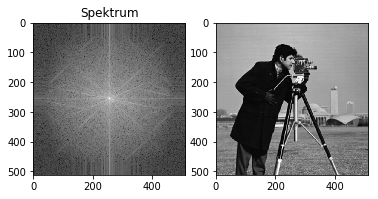

In [3]:
im = data.camera()

ft = np.fft.fft2(im)
ftshift = np.fft.fftshift(ft)
spek = 20*np.log(np.abs(ftshift))

# vizualizace
plt.subplot(121)
plt.imshow(spek, cmap = 'gray')
plt.title('Spektrum')

plt.subplot(122)
plt.imshow(im, cmap='gray')
plt.show()

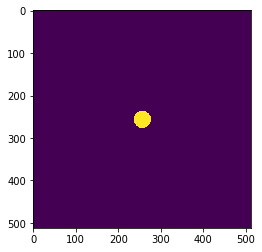

In [4]:
x, y = np.indices(im.shape)
center1 = (256, 256)
radius1 = 20
mask = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2

plt.imshow(mask)
plt.show()

C:\Program Files\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


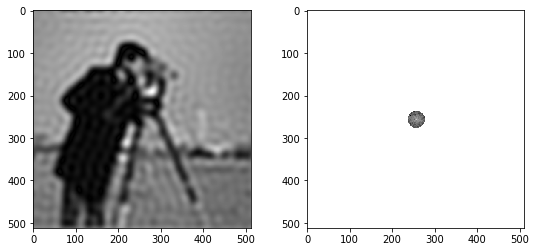

In [5]:
#ftshift * mask
ftshift_mask = ftshift*(mask)
ftishift_back = np.fft.ifftshift(ftshift_mask)
im_back = np.fft.ifft2(ftishift_back)
im_back = np.abs(im_back)

# Visualization
plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.imshow(im_back, cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(ftshift_mask)), cmap='gray')
plt.show()

C:\Program Files\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in log


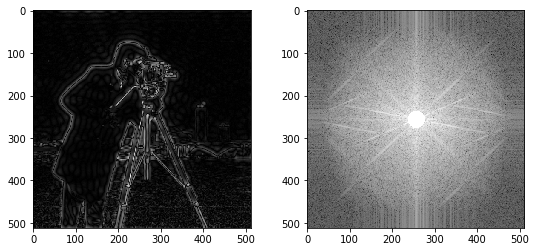

In [6]:
# Vytvoření filtru
x, y = np.indices(im.shape)
center2 = (256, 256)
radius2 = 80
mask2 = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2



# Filtrace a zpětná FT
ftshift_mask = ftshift*(1-mask2)
ftishift_back = np.fft.ifftshift(ftshift_mask)
im_back2 = np.fft.ifft2(ftishift_back)
im_back2 = np.abs(im_back2)

# Visualization
plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.imshow(im_back2, cmap='gray')
plt.subplot(122)

plt.imshow(np.log(np.abs(ftshift_mask)), cmap='gray')
plt.show()

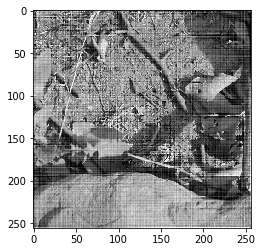

In [7]:
twigs = skimage.io.imread('twigs.jpg')
twigs = skimage.color.rgb2gray(twigs)
plt.imshow(twigs, cmap='gray')
plt.show()

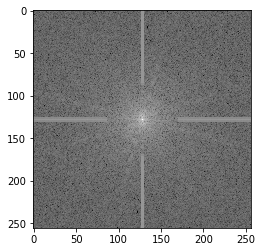

In [8]:
ft = np.fft.fft2(twigs)
ftshift = np.fft.fftshift(ft)
spek = 20*np.log(np.abs(ftshift))

plt.imshow(spek, cmap = 'gray')
plt.show()

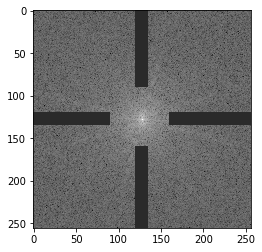

In [22]:
mask = np.ones_like(spek)
mask[120:135,:90] = 0
mask[:90, 120:135] = 0
mask[160:, 120:135] = 0
mask[120:135, 160:] = 0
plt.imshow(spek_new, cmap='gray')
plt.show()

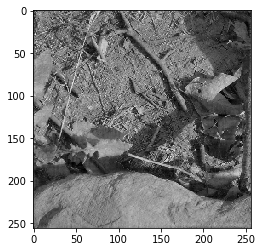

In [46]:
spek_new = ftshift*mask
ftishift_back = np.fft.ifftshift(spek_new)
im_back = np.fft.ifft2(ftishift_back)
im_back = np.abs(im_back)
plt.imshow(im_back, cmap = 'gray')
plt.show()

In [43]:
print(im_back)

[[ 222.29544135    4.47287083    4.59847562 ...,    6.90307204
     4.59847562    4.47287083]
 [   6.44836084   13.10437785    8.90716427 ...,    5.23783686
     7.68114261   13.76344374]
 [   4.25980331    8.57630652    7.28664301 ...,    4.43233296
     6.75625688    8.26487745]
 ..., 
 [   7.77927332    5.76161672    4.10264753 ...,    3.02880987    5.2221737
     5.52080755]
 [   4.25980331    8.26487745    6.75625688 ...,    4.66429938
     7.28664301    8.57630652]
 [   6.44836084   13.76344374    7.68114261 ...,    5.72096954
     8.90716427   13.10437785]]
